# Importing Packages And Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb

In [2]:
#Import data
year_2000_df = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
year_2001_df = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)

## Data Cleaning Pt. 2

In [4]:
# Keep only the imdb_id, certification, revenue, budget
year_2000_df = year_2000_df[['imdb_id','revenue','budget','certification']]
# Keep only the imdb_id, certification, revenue, budget
year_2001_df = year_2001_df[['imdb_id','revenue','budget','certification']]

In [5]:
#Drop all row with nan value
year_2000_df.dropna(inplace = True)
year_2001_df.dropna(inplace=True)

In [6]:
# checking duplicate value
print(year_2000_df.duplicated().sum())
print(year_2001_df.duplicated().sum())

0
0


> There no duplicate values

# Concatenate between 2000 to 2001

In [7]:
year_2000_df.head()

,imdb_id,revenue,budget,certification
4,tt0118694,12854953.0,150000.0,PG
5,tt0118852,0.0,0.0,R
6,tt0119273,0.0,15000000.0,R
7,tt0119495,0.0,0.0,R
11,tt0120467,14904.0,120000.0,R


In [8]:
year_2001_df.tail()

,imdb_id,revenue,budget,certification
1243,tt0810831,0.0,0.0,G
1245,tt0832449,0.0,0.0,PG-13
1249,tt1073223,0.0,0.0,PG-13
1274,tt3041064,0.0,0.0,NR
1290,tt8795764,0.0,0.0,NR


In [3]:
rbr_df = pd.concat([year_2000_df, year_2001_df], axis=0, join="inner")
display(rbr_df.head(), rbr_df.tail())

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2024.0,PG


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1288,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
1289,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
1290,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR
1291,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN
1292,tt0308977,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,10273.0,fr,Thelma,...,0.0,95.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Thelma,0.0,4.5,3.0,NaN


# Data Exploration

> How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

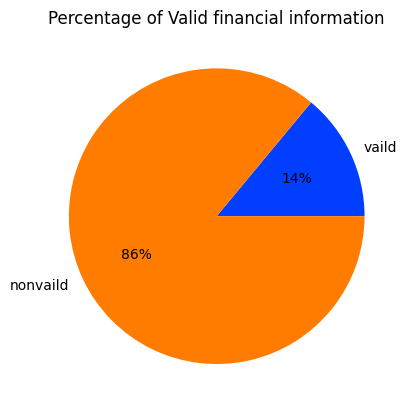

In [4]:
# Making a filter for budget OR revenue > 0
bud_filter = rbr_df['revenue'] > 0
rev_filter = rbr_df['budget'] > 0
# Create dataframe with budget OR revenue > 0
valid_fin_df = rbr_df.loc[bud_filter & rev_filter, :]
vaild_percent = len(valid_fin_df)/len(rbr_df)
nonvaild_percent = (len(rbr_df)-len(valid_fin_df))/len(rbr_df)
# Making the graph 
colors = sns.color_palette('bright')[0:2]
plt.pie([vaild_percent, nonvaild_percent], labels = ['vaild','nonvaild'], colors = colors, autopct='%.0f%%')
plt.title('Percentage of Valid financial information')
plt.show()

> 14 percent of movies have a vaild financial information

>How many movies are there in each of the certification categories (G/PG/PG-13/R)?

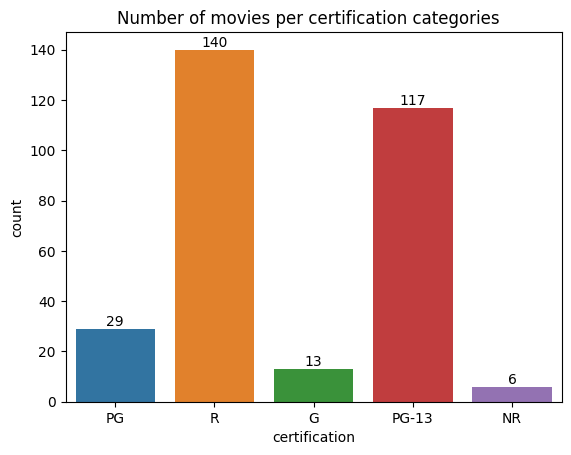

In [5]:
ax =sns.countplot(x='certification', data=rbr_df.loc[bud_filter & rev_filter, :])
plt.title('Number of movies per certification categories  ')
ax.bar_label(ax.containers[0]);

> R rated movies have the highest count with 140</br>
NC-17 is the lowest.

> What is the average revenue per certification category?

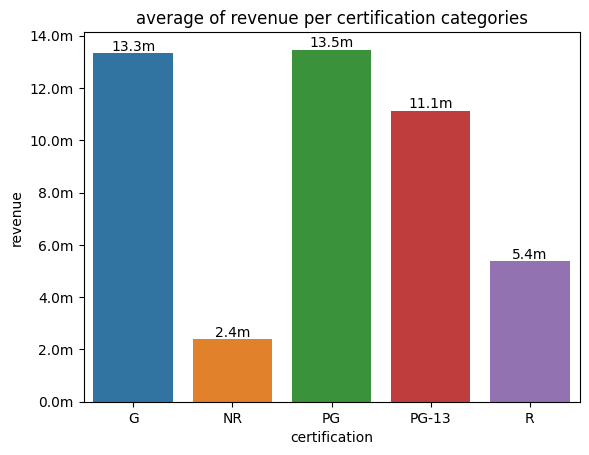

In [6]:
from matplotlib.ticker import FuncFormatter
#Convert the tick
def thousands(x, pos):
    return '%1.1fm' % (x * 1e-7)

formatter = FuncFormatter(thousands)
fig, ax = plt.subplots()
avg_rev = rbr_df.loc[bud_filter & rev_filter, :].groupby('certification')['revenue'].mean()
plt.title('average of revenue per certification categories')
sns.barplot(x= avg_rev.index, y=avg_rev).yaxis.set_major_formatter(formatter)
for p,date in zip(ax.patches, avg_rev.apply(lambda x: '%1.1fm' % (x * 1e-7))):
    ax.annotate(date, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')




> What is the average budget per certification category?

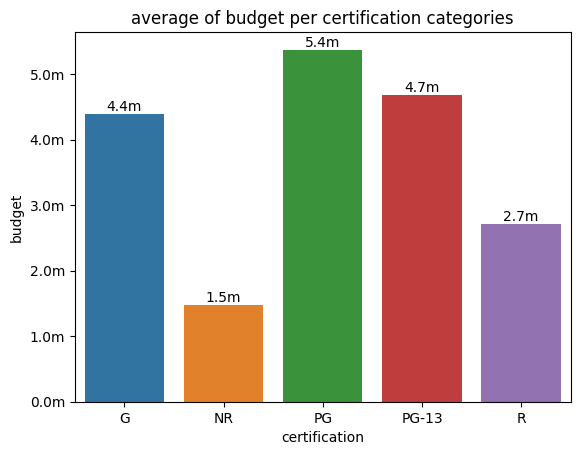

In [13]:
fig, ax = plt.subplots()
avg_rev = rbr_df.loc[bud_filter & rev_filter, :].groupby('certification')['budget'].mean()
sns.barplot(x= avg_rev.index, y=avg_rev).yaxis.set_major_formatter(formatter)
plt.title('average of budget per certification categories')
for p,date in zip(ax.patches, avg_rev.apply(lambda x: '%1.1fm' % (x * 1e-7))):
    ax.annotate(date, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
